# **Kaggle HW5: [Jerry.Y2003]**

**Remember to write your team name above, which MUST match your team name on Kaggle!!** Assignments without a team name will receive a 0/40 on the "accuracy on test data" component of this assignment's grade.

### **Load the Data**

In [107]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/23sp/homeworks/hw5/edx_test.csv', 
          'edx_test.csv')

### **Sample Code: Random Classifier**

**NOTE**: This classifier **DOES NOT** count as one of the 2 required for this assignment! It is merely here to illstrate how to submit your predictions.

See the Kaggle assignment (Data tab) for a description of each column in the dataset. You are creating a classifier to predict whether or not a student will get certified, stored in the `"certified"` column.

In [108]:
import pandas as pd
from sklearn.dummy import DummyClassifier

target = "certified" # target column

# This classifier returns labels sampled uniformly at random
df_train = pd.read_csv('edx_train.csv')
dummy_model = DummyClassifier(strategy="uniform")
dummy_model.fit(df_train.drop(target, axis=1), df_train[target])

DummyClassifier(strategy='uniform')

The code below generates predictions on the test set, and outputs the predictions into a CSV file.

In [109]:
# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
predictions = dummy_model.predict(df_test)

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# See below for instructions on how to upload submission.csv to Kaggle,
# in order to evaluate your model and get points.

### **[5 Pts] Model Comparison**

**Instructions**: Run at least 2 different classification models. The classification models we have learned in class are: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [Neural Networks](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). For each model, try at least 2 different hyperparameter settings. 

Then, make one or more visualizations that let you compare the models you trained. Sample visualizations you can make include confusion matrices, or graphs of train and validation accuracy/error. See past section and homework code for how to make these visualizations.

In [110]:
# pre-processing

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          8758 non-null   object 
 1   userid_DI          8758 non-null   object 
 2   registered         8758 non-null   int64  
 3   viewed             8758 non-null   int64  
 4   explored           8758 non-null   int64  
 5   certified          8758 non-null   int64  
 6   final_cc_cname_DI  8758 non-null   object 
 7   LoE_DI             7792 non-null   object 
 8   YoB                7844 non-null   float64
 9   gender             7983 non-null   object 
 10  start_time_DI      8758 non-null   object 
 11  last_event_DI      7250 non-null   object 
 12  nevents            7119 non-null   float64
 13  ndays_act          7119 non-null   float64
 14  nplay_video        2011 non-null   float64
 15  nchapters          6195 non-null   float64
 16  nforum_posts       8758 

In [111]:
from sklearn.tree import DecisionTreeClassifier

df_train = pd.read_csv('edx_train.csv')

target = "certified"

df_train = pd.get_dummies(df_train, columns=['gender'])
features = ['registered', 'viewed', 'explored', 'YoB', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'gender_f', 'gender_m']

df_train = df_train.fillna(df_train.mean())

decision_tree_model = DecisionTreeClassifier(max_depth = 6).fit(df_train[features], df_train[target])
decision_tree_model4 = DecisionTreeClassifier(max_depth = 4).fit(df_train[features], df_train[target])

# Generate predictions on the test set
df_test = pd.read_csv('edx_test.csv')
df_test = pd.get_dummies(df_test, columns=['gender'])
df_test = df_test.fillna(df_test.mean())
predictions = decision_tree_model.predict(df_test[features])

# Save your predictions as a CSV
to_save = df_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

<ipython-input-111-66e24971bb69>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())
<ipython-input-111-66e24971bb69>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test = df_test.fillna(df_test.mean())


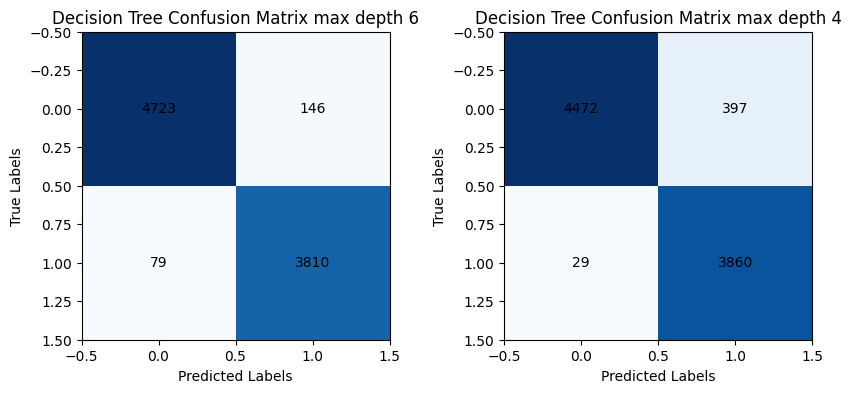

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_dt1 = confusion_matrix(df_train[target], decision_tree_model.predict(df_train[features]))
conf_matrix_dt2 = confusion_matrix(df_train[target], decision_tree_model4.predict(df_train[features]))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(conf_matrix_dt1.shape[0]):
    for j in range(conf_matrix_dt1.shape[1]):
        axes[0].text(j, i, str(conf_matrix_dt1[i, j]), ha='center', va='center', color='black')


for i in range(conf_matrix_dt2.shape[0]):
    for j in range(conf_matrix_dt2.shape[1]):
        axes[1].text(j, i, str(conf_matrix_dt2[i, j]), ha='center', va='center', color='black')


axes[0].imshow(conf_matrix_dt1, cmap='Blues', interpolation='nearest')
axes[0].set_title('Decision Tree Confusion Matrix max depth 6')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

axes[1].imshow(conf_matrix_dt2, cmap='Blues', interpolation='nearest')
axes[1].set_title('Decision Tree Confusion Matrix max depth 4')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')


plt.show()

In [113]:
from sklearn.ensemble import RandomForestClassifier

df_train = pd.read_csv('edx_train.csv')

target = "certified"

df_train = pd.get_dummies(df_train, columns=['gender'])
features = ['registered', 'viewed', 'explored', 'YoB', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'gender_f', 'gender_m']

df_train = df_train.fillna(df_train.mean())

RF_model = RandomForestClassifier(max_depth=2, random_state=0).fit(df_train[features], df_train[target])
RF_model4 = RandomForestClassifier(max_depth=4, random_state=0).fit(df_train[features], df_train[target])


<ipython-input-113-1cc812ae9543>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())


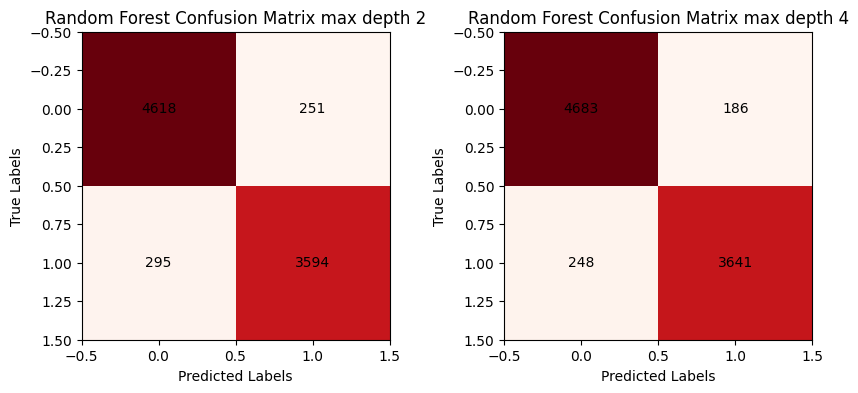

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix_rf1 = confusion_matrix(df_train[target], RF_model.predict(df_train[features]))
conf_matrix_rf2 = confusion_matrix(df_train[target], RF_model4.predict(df_train[features]))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(conf_matrix_rf1.shape[0]):
    for j in range(conf_matrix_rf1.shape[1]):
        axes[0].text(j, i, str(conf_matrix_rf1[i, j]), ha='center', va='center', color='black')


for i in range(conf_matrix_rf2.shape[0]):
    for j in range(conf_matrix_rf2.shape[1]):
        axes[1].text(j, i, str(conf_matrix_rf2[i, j]), ha='center', va='center', color='black')


axes[0].imshow(conf_matrix_rf1, cmap='Reds', interpolation='nearest')
axes[0].set_title('Random Forest Confusion Matrix max depth 2')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

axes[1].imshow(conf_matrix_rf2, cmap='Reds', interpolation='nearest')
axes[1].set_title('Random Forest Confusion Matrix max depth 4')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')


plt.show()

**Remember to submit your submissions CSV FILE on Kaggle!** 40 pts come from your accuracy on the private test data.

Attend section on Thurs 5/11 for a demo of how to uppload submissions to Kaggle. We also have screenshots below (ingore summer and homework number in pictures)

Step 1: See the list of files on Colab

![See Colab Files](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/1_colab_see_files.jpg)

Step 2: Download `submission.csv`

![Download Colab File](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/2_colab_download_file.jpg)

Step 3: Join the Kaggle competition.

![Join the Kaggle Competition](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/3_kaggle_join_competition.jpg)

Step 4: Enusre your team name in Kaggle matches the one at the top of this notebook! 

![Check Team Name](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/4_kaggle_team_name.jpg)

Step 5: Upload `submission.csv` to Kaggle

![Upload submission.csv](https://courses.cs.washington.edu/courses/cse416/22su/homework/hw4/programming/6_kaggle_upload_submission.jpg)



### **Discussion**



#### **[7 Pts] Training the Models**

**Instructions**: Discuss what models you tried, and what you did to improve your initial predictions. Discuss what hyperparameters you tried, and which hyperparameters seemed important for your final model. Finally, discuss what you are inferring from the above visualiation(s).

The model we tried are Decision tree and Random forest. We tried 4 and 6 max depth and 2 and 4 for them. The biggest improvement we made for my model is about selecting useful columns and dealing with Nan. The small changes of depth arent having a big effect on the model performance except if we changed it a lot different. The confusion matrix shows the performance of the models are pretty good. We can see there is a high accuracy in each of four matrixs for different models and parameters, although this confusion matrix only shows the training error, the test on Kaggle shows they are not overfitting with a score of aboving 0.97

#### **[3 Pts] Feature Selection**

**Instructions**: Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model?

We used all of the numerical features, and only used gender by transforming them to numerical values. We also have the Nan value as the mean of the column. We think most of the numerical features are important, showing the activeness of the students, which leads them to get a certification.

#### **[5 Pts] Ethical Implications**

**Instructions**: Consider and discuss the ethical implications of using the model you trained. Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?

We think the biggest ethical problem with this action is that if they focused on tailor their course to certain group of students, it may neglect students who belongs to other groups but indeed need these products or courses. We believe this goes against the fairness of education.